<h1>Health Lifestyle Dataset<h1>

<h2>Introduction<h2>

The Health & Lifestyle Dataset contains information on various factors that influence an individual’s overall well-being. It includes details such as age, gender, BMI, daily steps, sleep hours, water intake, calorie consumption, smoking and alcohol habits, heart rate, blood pressure, cholesterol levels, and family health history. This dataset helps in analyzing lifestyle patterns and assessing potential disease risks based on daily habits and health indicators.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv(r'c:\Data science\ML_Project\health_lifestyle_dataset.csv')
print(df.head())

   id  age  gender   bmi  daily_steps  sleep_hours  water_intake_l  \
0   1   56    Male  20.5         4198          3.9             3.4   
1   2   69  Female  33.3        14359          9.0             4.7   
2   3   46    Male  31.6         1817          6.6             4.2   
3   4   32  Female  38.2        15772          3.6             2.0   
4   5   60  Female  33.6         6037          3.8             4.0   

   calories_consumed  smoker  alcohol  resting_hr  systolic_bp  diastolic_bp  \
0               1602       0        0          97          161           111   
1               2346       0        1          68          116            65   
2               1643       0        1          90          123            99   
3               2460       0        0          71          165            95   
4               3756       0        1          98          139            61   

   cholesterol  family_history  disease_risk  
0          240               0             0  
1   

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null  int64  
dtypes: 

In [6]:
print(df.isna().sum())

id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64


In [7]:
print(df.columns)


Index(['id', 'age', 'gender', 'bmi', 'daily_steps', 'sleep_hours',
       'water_intake_l', 'calories_consumed', 'smoker', 'alcohol',
       'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol',
       'family_history', 'disease_risk'],
      dtype='object')


In [8]:
X = df.drop('disease_risk', axis=1) 
y = df['disease_risk']


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
X['gender'] = le.fit_transform(X['gender'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])


[[-1.73203349  0.41785343  0.99736348 -1.34192994 -1.1455731  -1.28184808
   0.49987542 -1.24038201 -0.50146832 -0.65468484  1.56289084  1.01803253
   1.23890048  0.36234166 -0.65332904]
 [-1.73199885  1.14465132 -1.00264349  0.67298224  0.70740503  1.2405169
   1.50193253 -0.31877385 -0.50146832  1.5274525  -0.44769687 -0.71597792
  -1.41286186 -0.39929876 -0.65332904]
 [-1.73196421 -0.14122186  0.99736348  0.40537672 -1.57977651  0.05352162
   1.11652595 -1.18959446 -0.50146832  1.5274525   1.07757656 -0.44624297
   0.54713639  1.65482236 -0.65332904]
 [-1.73192956 -0.92392727 -1.00264349  1.44431581  0.96508223 -1.43022249
  -0.57926301 -0.1775597  -0.50146832 -0.65468484 -0.23970504  1.17216679
   0.31654836 -1.13785916 -0.65332904]
 [-1.73189492  0.64148355 -1.00264349  0.72020675 -0.81020977 -1.33130622
   0.96236332  1.42782224 -0.50146832  1.5274525   1.63222145  0.17029408
  -1.64344989  1.60866234 -0.65332904]]


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
X = df.drop('disease_risk', axis=1) 
y = df['disease_risk']
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.752

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     15042
           1       0.25      0.00      0.00      4958

    accuracy                           0.75     20000
   macro avg       0.50      0.50      0.43     20000
weighted avg       0.63      0.75      0.65     20000


Confusion Matrix:
 [[15039     3]
 [ 4957     1]]


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7521

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     15042
           1       0.00      0.00      0.00      4958

    accuracy                           0.75     20000
   macro avg       0.38      0.50      0.43     20000
weighted avg       0.57      0.75      0.65     20000



c:\Users\Delfi benny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Delfi benny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Delfi benny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


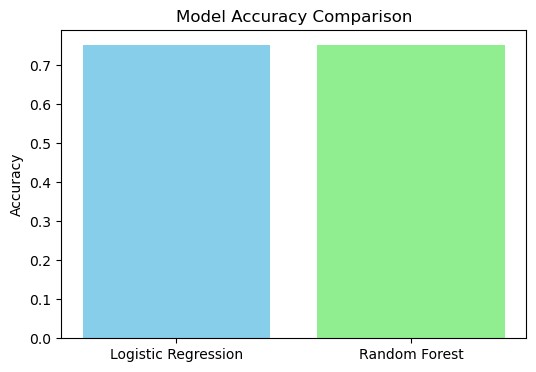

In [17]:
import matplotlib.pyplot as plt
acc_log = 0.7521   
acc_rf = 0.752   
plt.figure(figsize=(6,4))
plt.bar(['Logistic Regression', 'Random Forest'],
        [acc_log, acc_rf],
        color=['skyblue', 'lightgreen'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()



<h2>conclusion<h2>

The dataset includes health and lifestyle factors (X) like age, BMI, sleep hours, smoking, and cholesterol, with disease risk as the target (y). Both Random Forest Classifier and Logistic Regression models achieved 75% accuracy, showing moderate prediction performance.